In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
import matplotlib.gridspec as gridspec

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

session = cc.database.create_session()

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
input_path = '/g/data/e14/erd561/Australia_2004-2017/'

In [4]:
salt_z0_cmems = xr.open_dataset(input_path + 'salt_z0_cmems.nc').salt_z0_cmems
print(salt_z0_cmems)
salt_z0_slope_cmems = xr.open_dataset(input_path + 'salt_z0_slope_cmems.nc').salt_z0_slope_cmems*10
print(salt_z0_slope_cmems)
salt_z0_p_value_cmems = xr.open_dataset(input_path + 'salt_z0_p_value_cmems.nc').salt_z0_p_value_cmems
print(salt_z0_p_value_cmems)
salt_z0_std_err_cmems = xr.open_dataset(input_path + 'salt_z0_std_err_cmems.nc').salt_z0_std_err_cmems*10
print(salt_z0_std_err_cmems)

salt_z0_1_mod = xr.open_dataset(input_path + 'salt_z0_1_mod.nc').salt_z0_1_mod
print(salt_z0_1_mod)
salt_z0_1_slope_mod = xr.open_dataset(input_path + 'salt_z0_1_slope_mod.nc').salt_z0_1_slope_mod*10
print(salt_z0_1_slope_mod)
salt_z0_1_p_value_mod = xr.open_dataset(input_path + 'salt_z0_1_p_value_mod.nc').salt_z0_1_p_value_mod
print(salt_z0_1_p_value_mod)
salt_z0_1_std_err_mod = xr.open_dataset(input_path + 'salt_z0_1_std_err_mod.nc').salt_z0_1_std_err_mod*10
print(salt_z0_1_std_err_mod)

salt_z0_025_mod = xr.open_dataset(input_path + 'salt_z0_025_mod.nc').salt_z0_025_mod
print(salt_z0_025_mod)
salt_z0_025_slope_mod = xr.open_dataset(input_path + 'salt_z0_025_slope_mod.nc').salt_z0_025_slope_mod*10
print(salt_z0_025_slope_mod)
salt_z0_025_p_value_mod = xr.open_dataset(input_path + 'salt_z0_025_p_value_mod.nc').salt_z0_025_p_value_mod
print(salt_z0_025_p_value_mod)
salt_z0_025_std_err_mod = xr.open_dataset(input_path + 'salt_z0_025_std_err_mod.nc').salt_z0_025_std_err_mod*10
print(salt_z0_025_std_err_mod)

salt_z0_01_mod = xr.open_dataset(input_path + 'salt_z0_01_mod.nc').salt_z0_01_mod
print(salt_z0_01_mod)
salt_z0_01_slope_mod = xr.open_dataset(input_path + 'salt_z0_01_slope_mod.nc').salt_z0_01_slope_mod*10
print(salt_z0_01_slope_mod)
salt_z0_01_p_value_mod = xr.open_dataset(input_path + 'salt_z0_01_p_value_mod.nc').salt_z0_01_p_value_mod
print(salt_z0_01_p_value_mod)
salt_z0_01_std_err_mod = xr.open_dataset(input_path + 'salt_z0_01_std_err_mod.nc').salt_z0_01_std_err_mod*10
print(salt_z0_01_std_err_mod)

<xarray.DataArray 'salt_z0_cmems' (lat: 360, lon: 361, year: 14)>
[1819440 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -69.875 -69.625 -69.375 ... 19.375 19.625 19.875
  * lon      (lon) float32 89.875 90.125 90.375 ... 179.375 179.625 179.875
  * year     (year) int64 2004 2005 2006 2007 2008 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'salt_z0_slope_cmems' (lat: 360, lon: 361)>
array([[        nan,         nan,         nan, ..., -0.0081274 ,
        -0.00795176, -0.00778902],
       [        nan,         nan,         nan, ..., -0.00673676,
        -0.00649991, -0.00599058],
       [        nan,         nan,         nan, ..., -0.00684466,
        -0.00656765, -0.00545108],
       ...,
       [ 0.00972878,  0.03850258,  0.06507991, ..., -0.00550348,
        -0.01016043, -0.00989524],
       [ 0.03514883,  0.06043772,  0.08800293, ..., -0.00465896,
        -0.00603997, -0.0078213 ],
       [ 0.06850224,  0.09022966,  0.10618985, ..., -0.00460396,
        -0.003

<xarray.DataArray 'salt_z0_01_std_err_mod' (yt_ocean: 1186, xt_ocean: 900)>
array([[       nan,        nan,        nan, ..., 0.04044955, 0.03984582,
        0.03942704],
       [       nan,        nan,        nan, ..., 0.04019328, 0.0397682 ,
        0.0394648 ],
       [       nan,        nan,        nan, ..., 0.04026501, 0.03992414,
        0.03958583],
       ...,
       [0.49918106, 0.47622851, 0.44620528, ..., 0.06090156, 0.06091608,
        0.0605033 ],
       [0.52290934, 0.49528455, 0.4628069 , ..., 0.06090302, 0.06072693,
        0.06015284],
       [0.54101115, 0.50928044, 0.47258238, ..., 0.06103927, 0.06063125,
        0.05983955]])
Coordinates:
  * yt_ocean  (yt_ocean) float64 -70.0 -69.96 -69.92 ... 19.75 19.84 19.94
  * xt_ocean  (xt_ocean) float64 90.05 90.15 90.25 90.35 ... 179.8 179.9 180.0


Bbox(x0=0.125, y0=0.5368181818181819, x1=0.29347826086956524, y1=0.88)
[0.125, 0.5368181818181819, 0.31097826086956526, 0.88]
Bbox(x0=0.3271739130434783, y0=0.5368181818181819, x1=0.4956521739130435, y1=0.88)
[0.3271739130434783, 0.5368181818181819, 0.5131521739130435, 0.88]
Bbox(x0=0.5293478260869566, y0=0.5368181818181819, x1=0.6978260869565218, y1=0.88)
[0.5293478260869566, 0.5368181818181819, 0.7153260869565218, 0.88]
Bbox(x0=0.7315217391304348, y0=0.5368181818181819, x1=0.9000000000000001, y1=0.88)
[0.8215217391304348, 0.5368181818181819, 1.0075, 0.88]
Bbox(x0=0.125, y0=0.1250000000000001, x1=0.29347826086956524, y1=0.46818181818181825)
[0.125, 0.20000000000000012, 0.31097826086956526, 0.5431818181818182]
Bbox(x0=0.3271739130434783, y0=0.1250000000000001, x1=0.4956521739130435, y1=0.46818181818181825)
[0.3271739130434783, 0.20000000000000012, 0.5131521739130435, 0.5431818181818182]
Bbox(x0=0.5293478260869566, y0=0.1250000000000001, x1=0.6978260869565218, y1=0.46818181818181825)
[0

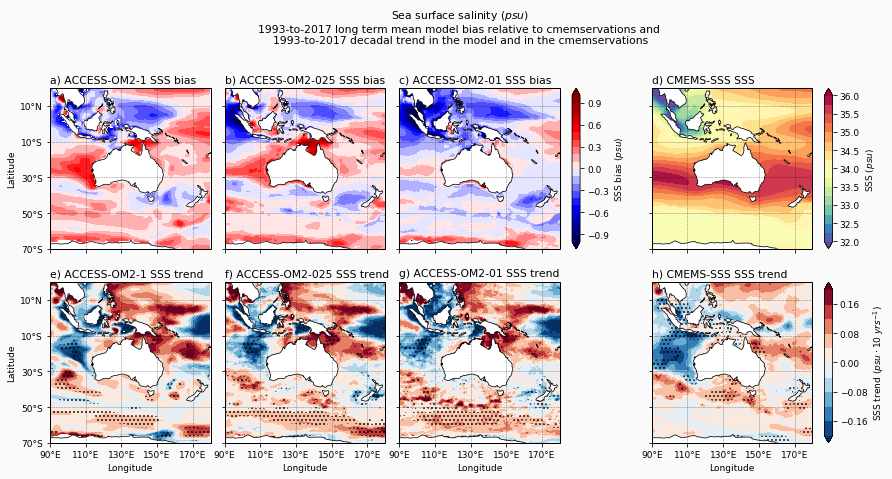

In [8]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=0.75)

# fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
fig = plt.figure(1, figsize=(12,8), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 9})    

plt.suptitle(
    r'Sea surface salinity ($psu$)' +
    '\n1993-to-2017 long term mean model bias relative to cmemservations and ' +
    '\n1993-to-2017 decadal trend in the model and in the cmemservations',
    x=0.6,y=0.99, ha='center')

row=2
col=4

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
levels=arange(-1,1,0.1)
cmap = plt.cm.seismic
data = salt_z0_1_mod.mean('year').interp(xt_ocean=salt_z0_cmems.lon).interp(yt_ocean=salt_z0_cmems.lat)\
- salt_z0_cmems.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('a) ACCESS-OM2-1 SSS bias', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral
data = salt_z0_025_mod.mean('year').interp(xt_ocean=salt_z0_cmems.lon).interp(yt_ocean=salt_z0_cmems.lat)\
- salt_z0_cmems.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('b) ACCESS-OM2-025 SSS bias', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral
data = salt_z0_01_mod.mean('year').interp(xt_ocean=salt_z0_cmems.lon).interp(yt_ocean=salt_z0_cmems.lat)\
- salt_z0_cmems.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('c) ACCESS-OM2-01 SSS bias', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'SSS bias ($psu$)', cax=axins)


ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0, pos.x1+0.1075, pos.y1] 
print(pos_plot)
levels=arange(32,36,0.25)
cmap = plt.cm.Spectral_r
data = salt_z0_cmems.mean('year')
plot = plt.contourf(data.lon, data.lat, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('d) CMEMS-SSS SSS', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'SSS ($psu$)', cax=axins)

ax = plt.subplot(row, col, 5, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.075, pos.x1+0.0175, pos.y1+0.075] 
print(pos_plot)
levels=arange(-0.2,0.2,0.04)
cmap = plt.cm.RdBu_r
data = salt_z0_1_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = salt_z0_1_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('e) ACCESS-OM2-1 SSS trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 6, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.075, pos.x1+0.0175, pos.y1+0.075] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = salt_z0_025_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = salt_z0_025_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('f) ACCESS-OM2-025 SSS trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 7, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.075, pos.x1+0.0175, pos.y1+0.075] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = salt_z0_01_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = salt_z0_01_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('g) ACCESS-OM2-01 SSS trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 8, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0+0.075, pos.x1+0.1075, pos.y1+0.075] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = salt_z0_slope_cmems
plot = plt.contourf(data.lon, data.lat, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = salt_z0_p_value_cmems
plot2 = plt.contourf(data.lon, data.lat, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('h) CMEMS-SSS SSS trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'SSS trend ($psu \cdot 10\ yrs^{-1}$)', cax=axins)

savefigure('SSS_bias_trend')